# A quick-start tutorial of calling CPLEX/Gurobi/Mosek in Julia
<center>
<br>
by __[Yuquan (Bill) Du](http://www.utas.edu.au/profiles/staff/amc/yuquan-du)__  at University of Tasmania, Australia
<br>    

This article will provide you with a quick-start tutorial on how to call the state-of-the-art optimisation solvers, such as IBM ILOG CPLEX Optimizer, Gurobi, and Mosek, through the __[Julia](https://julialang.org/)__  programming lauguage. **Note that the purpose of this tutorial is educational, instead of jeopardizing the credits of __[the official documents of JuMP](http://www.juliaopt.org/JuMP.jl/0.18/index.html)__**. Actually, many code snippets are from the JuMP official documents. This tutorial enables you to start formulating and solving your models via CPLEX/Gurobi/Mosek within 2 hours.

I have been using these commercial optimisation solvers for around one decade since the roll-out of academic intiatives from IBM, Gurobi and Mosek. I used to call these solvers in C++ which is regarded as a nuclear weapon in the arsenal of programming languages. However, then I switched to MATLAB by using __[YALMIP](https://yalmip.github.io/)__ as the modelling (formulation) tool, due to several reasons:
-  you have to mannually look after the project settings in Visual Stuidio to let the IDE know where CPLEX/Concert libraries are, even though you just want to run a small peice of code;
-  the data munipulation and visualisation in C++ is quite cumbersome; and
-  if you want to run the same model over another solver, e.g. Gurobi, you have to rewrite the formulation code completely by calling the API of the new solver.

YALMIP, a toolbox in MATLAB, fortunately, overcomes the above inconvinence by playing as a formulation tool: switching to another solver can be fulfilled by changing just one line of code. And meanwhile, you can enjoy the data manipulation and visualisation capabilities of MATLAB. Actually, in the past decade, I promoted YALMIP a lot in China and Singapore.

Now, I switched to another emerging programming lauguage, Julia, simply because of its advantages in both expressiveness and 
efficiency: with the built-in complexity of complier, Julia code can be as nearly fast as C/C++ (static/compiling lauguage), while still enjoying the expressiveness and data manipulation capability of a dynamic/script launagage such as Matlab and Python. Meanwhile, different from Matlab, Julia is free of charge. That is, students will bring Julia with them smoothly into industries in their future job positions. To see how this newly-born programming language is popular, one of my close friends in Singapore, Dr Liye Zhang, presented __[a great analysis on the popularity trend of Julia](https://juliatrend.github.io/?from=timeline&isappinstalled=0)__ . Some __[mass media news](https://www.zdnet.com/article/possible-python-rival-programming-language-julia-is-winning-over-developers/)__  might also shock you if you know something about Python.

In Julia langauge, we also have a modelling/formulation tool (package) named __[JuMP](http://www.juliaopt.org/JuMP.jl/0.18/index.html)__  which can help you quickly input your mathematical models to a computer (and solve them). JuMP in Julia plays a similar role as that of YALMIP in MATLAB. Thus, with the JuMP package, the optimisation solvers (CPLEX, Gurobi, Mosek, etc.) are nothing but backends hooked behind JuMP/Julia. To see the computational efficiency of your model in another solver, you only need to change one line of your original code. Apart from the expressiveness of JuMP in your modelling, you must love the data manipulation and visualisation capabilities of the Julia language which can be extremely useful before and after solving your model.

This tutorial is also of interest of students who are learning Operations Research or Mathematical Modelling. The orginal motivation of my writing this article is to help the students in University of Tasmania (UTAS) to better learn Operations Research or Mathematical Modelling. To train my PhD students is another motivation. This tutorial mainly covers the solving of linear programming (LP), quadratic programming (QP), quadratically constrained quadratic programming (QCQP) models and their mixed-integer versions (MILP, MIQP, MIQCQP).

Assume you have properly installed the Julia language and an optimisation solver (e.g. CPLEX or Gurobi) on your computer. Note that here I use __[Jupyter](http://jupyter.org/)__ as the IDE of the Julia lauguage. To check whether you have well installed CPLEX in your computer, run "cplex" in the command prompt, and you will see the welcome message if your installation of CPLEX 12.8 is successful:

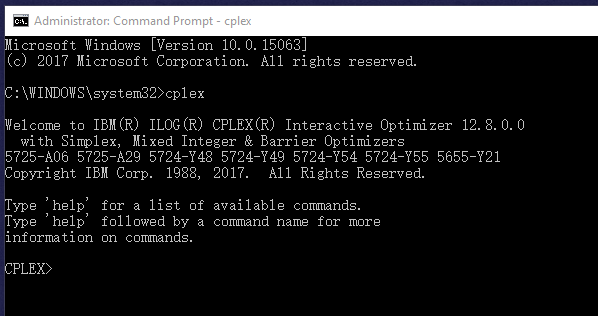


Alternatively, you may prefer Gurobi, instead of CPLEX:

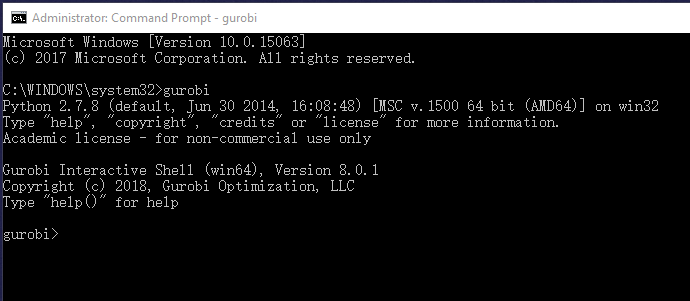

Here, make sure that you download the academic version of CPLEX or Gurobi, since the academic version provides the same funcationalities as the commercial version. They are free of charge for academia. UTAS students feel free to contact me if you have difficulty in getting the software of CPLEX or Gurobi.


## 1. Install the modelling package JuMP in Julia

JuMP is a modelling package in Julia and it helps us to write the components (variables, constraints and objectives) of your model in a convenient way. Without JuMP, it would be laborious to express your model in Julia, and the code for your model is also solver-specific.
To install JuMP, run the following code in Julia:

In [ ]:
using Pkg
Pkg.add("JuMP")

Then, you can use/import JuMP

In [ ]:
using JuMP

## 2. Let JuMP/Julia see CPLEX or Gurobi installed in your computer

Though CPLEX or Gurobi has been installed in this computer, however JuMP/Julia is still not able to see it. To let JuMP/Julia see your Gurobi solver, run the following code:

In [ ]:
using Pkg
Pkg.add("Gurobi")

CPLEX's location can be also similarly put into the vision of JuMP/Julia by adding the CPLEX.jl package. But before doing so, you have to create a new environmental variable named "CPLEX_STUDIO_BINARIES" in your computer (e.g. Windows 10 system) and set the value of this environmental variable as the the location of IBM ILOG cplex binary library. In my computer, the location is "C:\Program Files\IBM\ILOG\CPLEX_Studio128\cplex\bin\x64_win64".

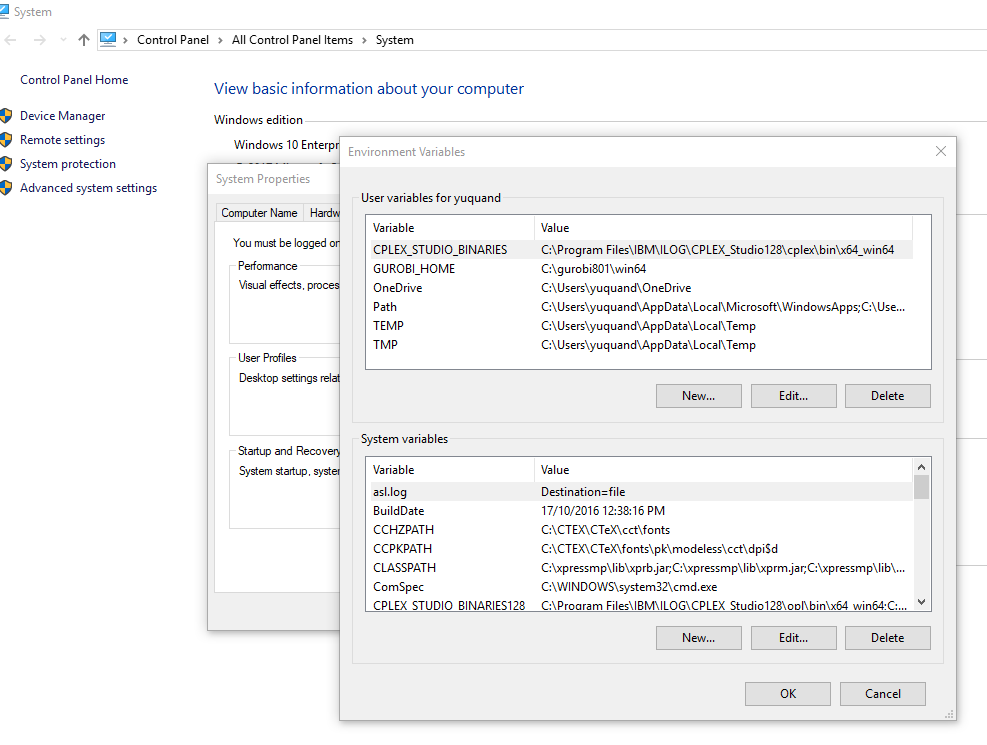

Then run the package adding code.

In [ ]:
Pkg.add("CPLEX")

Now we can use JuMP as a formulation tool to express our mathematical/optimisation model, and solve it by calling an external solver (CPLEX or Gurobi) playing as the backend of JuMP.

## 3. A linear programming model and the JuMP/Julia code

Consider the following linear programming model which is often encountered in your textbooks on optimisation or Operations Research.
$$min\quad -x_1-2x_2-3x_3$$
$$s.t.\quad -x_1+x_2+x_3\le 20$$
$$x_1-3x_2+x_3\le 30$$
$$0\le x_1\le 40$$
$$0\le x_2$$
$$0\le x_3$$

We call use the following JuMP/Julia code to express this model, and call CPLEX to solve it.

In [ ]:
# Import the JuMP and solver package
using JuMP
using CPLEX #"using  Gurobi" if you want to use Gurobi as the solver

In [ ]:
# Create a Mobel object "model", since all the variables, constraints and objective will be binded to this object
model = Model(solver = CplexSolver()) # You can specify the solver which solves this model. Here, we use CPLEX. For Gurobi, use "solver = GurobiSolver()"

# Declare the variables in this model, by calling the macro @variable: @variable(m, lb <= x <= ub); @variable(m, x >= lb)
# When multiple variables are declared, we can use the array form: @variable(m, x[1:M,1:N] >= 0).
@variable(model, 0 <= x1 <= 40) 
@variable(model, x2 >= 0) # @variable(model, 0 <= x2) is not correct in syntax, since "@variable(model, a <= b)" with symbals "a" and "b" will cause confusion on which of "a" and "b" is the variable and which is the constant
@variable(model, x3 >= 0)

#Set up the constraints by calling the macro @constraint
@constraint(model, -x1+x2+x3 <= 20)
@constraint(model, x1-3x2+x3 <= 30)

#Objective formulation by calling the macro @objective
@objective(model, Min, -x1-2x2-3x3) # The sense of objective can be Max or Min

# You can print out the model if you like
# print(model)

# Solve the model
status = solve(model)

# Retrieve the solution and the objective
println("Objective value: ", getobjectivevalue(model)) # Call "getobjectivevalue()"
println("x1 = ", getvalue(x1)) # Call "getvalue()"
println("x2 = ", getvalue(x2))
println("x2 = ", getvalue(x3))


## 4. A quadratic programming model and the JuMP/Julia code

Let us consider the following quadratic programming model:
$$max\quad x_1+2x_2+3x_3-0.5(33x_1^2+22x_2^2+11x_3^2-12x_1x_2-23x2x_3)$$
$$s.t.\quad -x_1+x_2+x_3\le 20$$
$$x_1-3x_2+x_3\le 30$$
$$0\le x_1\le 40$$
$$0\le x_2$$
$$0\le x_3$$

A quadratic term of $x^2$ can be written as ```x*x``` in Julia. Similarly, a bilinear term of $xy$ is coded as ```x*y```. Thus, with the syntax we learnt from Section 3, the above quadratic programming model can be modeled and solved with the following JuMP/Julia code.

In [ ]:
# Model
model = Model(solver = CplexSolver()) 
# Variables
@variable(model, 0 <= x1 <= 40) 
@variable(model, x2 >= 0) # @variable(model, 0 <= x2) is not correct in syntax
@variable(model, x3 >= 0)
# Constraints
@constraint(model, -x1+x2+x3 <= 20)
@constraint(model, x1-3x2+x3 <= 30)
# Objective
@objective(model, Max, x1+2x2+3x3-0.5(33x1*x1+22x2*x2+11x3*x3-12x1*x2-23x2*x3))

# Solve the model
status = solve(model)

# Retrieve the solution and the objective
println("Objective value: ", getobjectivevalue(model))
println("x1 = ", getvalue(x1))
println("x2 = ", getvalue(x2))
println("x2 = ", getvalue(x3))

A second-order cone programming (SOCP) model is a convex quadratically constrained quadratic/linear programming (QCQP) model. Using SOCP constraints explicitly informing the solver of its convexity will eliminate the necessity of determmining its convexity and thus saves computational time. This can be done by using the command ```norm```. Note that ```norm()``` can be used in the same way as ```sum()```, with **for** and **if** statements.

> 
```Julia
@variable(model, norm(A*x) <= b)  
@constraint(model, norm(2x[i] - i for i=1:n if c[i] == 1) <= 1)
```

## 5. Useful modelling tips

### 5.1. Integer variables, binary variables, and positive semidefinite variables

Specify the third argument of the macro ```@variable()``` as **Int**, **Bin** or **PSD**:

> 
```Julia
@variable(model, 0 <= x1 <= 40, Int)
@variable(model, y, Bin)
@variable(model, x[1:2, 1:2], PSD)
```

### 5.2. A group of constraints with indexes

A group of constraints with indexes
$$-x_i+2y_j\le a_i,\quad i\in\{1,2,...,10\},\quad j\in\{2,...,20\}$$
can be modelled as

> 
```Julia
@constraint(model, [i=1:10,j=2:20], -x[i]+2y[j] <= a[i])
```                                                   

The indexes with more complex conditions
$$-x_i+2y_j\le a_i,\quad i\in\{1,2,...,10\},\quad j\in\{2,...,20\},\quad i+j>8,\ j=2i$$
can also be easily dealt with:

> 
```Julia
@constraint(model, [i=1:10,j=2:20;i+j>8 && j=2i], -x[i]+2y[j] <= a[i])
```

The second argument of the macro ```@constraint``` is the name of a constraint. Thus, the above code actually uses anonymous constraints. You can also give a name, e.g. **_xyaconstraints_**, to this group of constraints,

> 
```Julia
@constraint(model, xyaconstraints[i=1:10,j=2:20], -x[i]+2y[j] <= a[i])
```

so that you can manipulate these constraints later. For instance, getting the dual of some constraints:

> 
```Julia
println(getdual(xyaconstraints[3,6]))
```

You can see that Julia/JuMP is more expressive than IBM ILOG Concert (C++/Java) and Matlab/YALMIP which generally explictly employ **for** and **if** statements to model a indexed group of constraints. JuMP makes your code very close to your model on paper.

### 5.3. ```sum()``` powered by "for" and "if" statements

Summation is often used in constraints and objectives. In Julia/JuMP, the statements of **for** and **if** can be used together with ```sum()``` to make summation extremely flexiable, as expressive as the mathematical notations on paper. For instance, the constraint
$$\sum_{i=1\dots10}\quad \sum_{j=2\dots20,i+j>8,j=2i} -x_i+2y_j \le a$$
can be modelled as 


> 
```Julia
@constraint(model,sum(-x[i]+2y[j] for i=1:10,j=2:20 if i+j>8 && j=2i) <= a)
```

### 5.4. ```@expression()``` to improve the convenience of modelling constraints and objectives

The macro ```@expression``` has the similar usage to ```@constraint```. Sometimes, it is more convenient to build some expressions first and then use them in constraints and objectives later.

> 
```Julia
@expression(model, shared, sum(i*x[i] for i=1:5))
@constraint(model, shared + y >= 5)
@constraint(model, shared + z <= 10)
@expression(model, expr[i=1:3], i*sum(x[j] for j=1:3))
```

### 5.4. Vectorized constraints

Constraints can also be added in the form of vectors.
-  Example 1
> 
```Julia
@variable(m, x[1:10])
A = rand(5,10)
b = rand(5)
@constraint(m, A*x + b .<= 1)
```
-  Example 2
> 
```Julia
@variable(m, x[1:3])
A = [1 x'
     x x*x']
```

## 6. Adding variables and modifying constraints

Sometimes, as in column generation, we may consider adding some new variables to the current model. Adding variables can be fulfilled by using the third argument of the macro ```@variable()``` **_objective_** specifying its coefficient in the objective, the fourth argument **_inconstraints_** specifying which constraints it gets involved in, and the fifth argument **_coefficients_** specifying the corresponding coefficients in these constraints. 

> 
```Julia
m = Model()
@variable(m, 0 <= x <= 1)
@variable(m, 0 <= y <= 1)
@objective(m, Max, 5x + 1y)
@constraint(m, con, x + y <= 1)
solve(m)  # x = 1, y = 0
@variable(m, 0 <= z <= 1, objective = 10.0, inconstraints = [con], coefficients = [1.0])
# The constraint is now x + y + z <= 1
# The objective is now 5x + 1y + 10z
solve(m)  # z = 1
```

The method ```setRHS()``` provides the functionality of changing the right-hand side of a constraint.

> 
```Julia
@constraint(m, mycon, x + y <= 4)
solve(m)
JuMP.setRHS(mycon, 3)  # Now x + y <= 3
solve(m)  # Hot-start for LPs
```

## 7. Useful methods

-  ```numvar(model)```: returns the number of variables associated with Model _model_;
-  ```numconstr(model)```: returns the total number of constraints associated with Model _model_. The number of linear, quadratic SOCP, SDP and nonlinear constraints can be accessed by ```numlinconstr(model)```, ```numquadconstr(model)```, ```numsocconstr(model)```, ```numsdconstr(model)```, and ```numnlconstr(model)```, respectively;
-  ```getsolvetime(model)```: returns the solve time reported by the solver;
-   ```getobjbound(model)``` or ```getobjectivebound(model)```: returns the best bound until the solver is terminated;
-   ```getobjgap(model)```: returns the final relative optimality gap when the solver is terminated;
-   ```solve(model; relaxation=false)```: solves the standard continuous relaxation for the model;
-   ```build(model)```: builds the model in memory without optimising;
-   ```internalmodel(model)```: returns the internal low-level _AbstractMathProgModel_ object which can be used to access any functionality that is not exposed by JuMP; when it is ready to optimize, simply call ```solve()``` in the normal fashion;
-   ```writeLP(model,filename)``` or ```writeMPS(model,filename)```: write the model to filename in the LP or MPS file format.

## 8. Setting solver parameters

We can set the parameters of CPLEX, the same as those in C APIs, when specifying the solver ```solver = CplexSolver(parameters)```.
>  
```Julia
model = Model(solver = CplexSolver(CPXPARAM_TimeLimit=300, CPXPARAM_MIP_Tolerances_AbsMIPGap=0.5, CPXPARAM_MIP_Tolerances_MIPGap=0.005, CPXPARAM_OptimalityTarget=3)) #time limit, absolute optimality gap, relative optimiality gap, nonconvex QP to global optimal 
```

## 9. Solver callbacks

See the __[solver callback webpage](http://www.juliaopt.org/JuMP.jl/0.18/callbacks.html)__ on the official documents of JuMP.